In [93]:
import numpy as np
import pandas as pd
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix
import time
# from imblearn.over_sampling import SMOTE
from collections import Counter
# import tensorflow as tf
import re

os.getcwd() 
os.chdir("/Users/macbook/Downloads/lending-club")
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')
df=accepted.copy()

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [94]:
df.loan_amnt.isnull().sum()
df = df.dropna(axis=0, subset=['loan_amnt'])

Text(0.5, 1.0, 'Total committed by Investors')

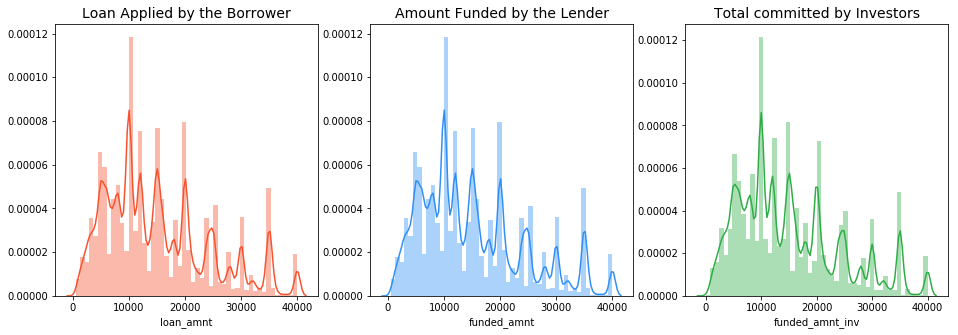

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amnt"]
funded_amount = df["funded_amnt"]
investor_funds = df["funded_amnt_inv"]


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

# accepted['loan_amnt'].plot.hist()

In [96]:
# drop the loans with status = current 
df = df[df.loan_status != 'Current']

In [97]:
tot_loan_amnt = df.loan_amnt.sum(axis = 0, skipna = True)
tot_funded_amnt = df.funded_amnt.sum(axis = 0, skipna = True)
tot_funded_amnt_inv = df.funded_amnt_inv.sum(axis = 0, skipna = True)

LD_funded_amnt = tot_funded_amnt - tot_funded_amnt_inv
LD_funded_amnt # $37,446,588.72 = funded by Lending Club itself

37446588.72096634

In [98]:
# return of investment if EVERY note [exclude 'current'] is invested

tot_pymnt = df.total_pymnt.sum(axis = 0, skipna = True)
ROI = ((tot_pymnt - tot_funded_amnt)/tot_funded_amnt)*100

ROI

1.4445241788286827

In [99]:
df['ROI'] = ((df.total_pymnt - df.funded_amnt)/df.funded_amnt)*100
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,ROI
433321,130470776,NaN,6500.0,6500.0,6500.0,36 months,14.07,222.38,C,C3,PSR / Coordinator,4 years,RENT,35000.0,Source Verified,Mar-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,543xx,WI,30.86,0.0,Dec-2006,730.0,734.0,1.0,NaN,NaN,15.0,0.0,9710.0,14.4,29.0,w,0.0,0.0,6905.305732,6905.31,6500.0,405.31,0.0,0.0,0.0,Sep-2018,5856.09,NaN,Feb-2019,609.0,605.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,21768.0,1.0,1.0,1.0,1.0,9.0,12058.0,46.0,3.0,4.0,2355.0,23.0,67200.0,0.0,0.0,3.0,5.0,1451.0,44260.0,8.4,0.0,0.0,9.0,135.0,1.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,4.0,9.0,7.0,13.0,1.0,14.0,28.0,9.0,15.0,0.0,0.0,0.0,4.0,100.0,14.3,0.0,0.0,93648.0,21768.0,48300.0,26448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,6.235473
881115,111927845,NaN,20125.0,20125.0,20125.0,36 months,14.08,688.61,C,C3,Police Officer,1 year,RENT,47000.0,Not Verified,Jun-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,860xx,AZ,30.13,0.0,Jul-2006,745.0,749.0,0.0,NaN,NaN,6.0,0.0,8207.0,37.3,10.0,w,0.0,0.0,20591.247802,20591.25,20125.0,466.25,0.0,0.0,0.0,Aug-2017,19918.38,NaN,Aug-2017,794.0,790.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,28038.0,0.0,3.0,1.0,1.0,10.0,19831.0,42.0,0.0,0.0,3674.0,40.0,22000.0,1.0,5.0,1.0,1.0,4673.0,10826.0,25.3,0.0,0.0,74.0,131.0,33.0,10.0,0.0,33.0,NaN,10.0,NaN,0.0,1.0,2.0,2.0,2.0,5.0,3.0,5.0,2.0,6.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,69493.0,28038.0,1

Text(0, 0.5, 'Average loan amount issued')

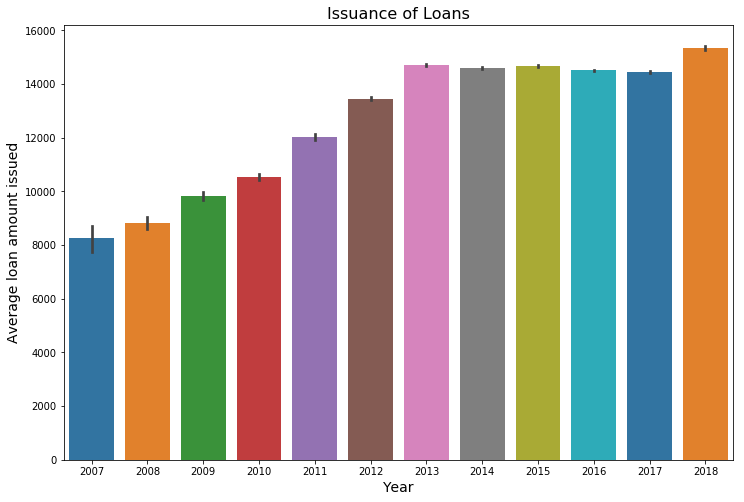

In [100]:
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

# majority of the loans were issued after 2015

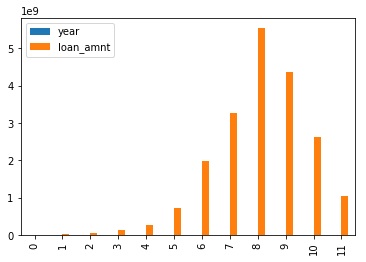

In [117]:
df.groupby(['year'], as_index=False).loan_amnt.sum().plot.bar()

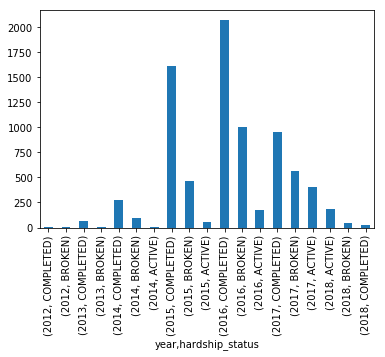

In [118]:
df.groupby('year')['hardship_status'].value_counts().plot.bar()

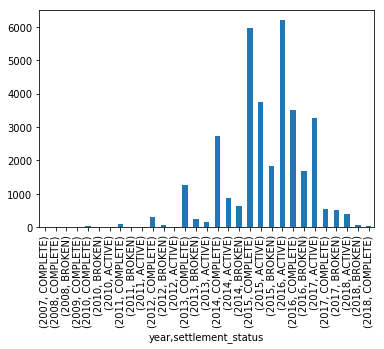

In [119]:
df.groupby('year')['settlement_status'].value_counts().plot.bar()

In [101]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

[Text(0, 0.5, '(%)')]

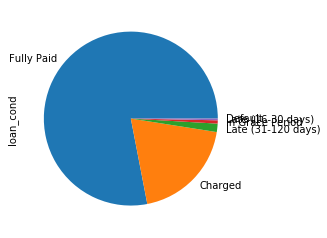

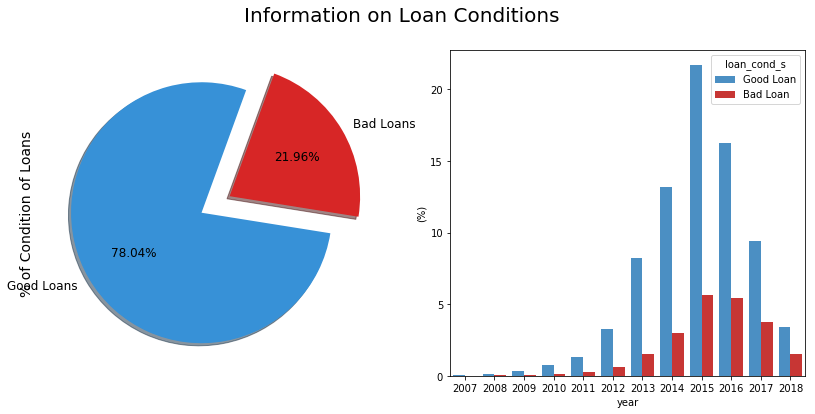

In [102]:
# Besides current loans and all the loans that are fully paid, consider the remaining type as bad loans

Paid = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
Charged_off = ['Charged Off','Does not meet the credit policy. Status:Charged Off']

df['loan_cond'] = np.nan

def loan_condition(status):
    if status in Paid:
        return 'Fully Paid'
    elif status in Charged_off:
        return 'Charged'
    else:
        return status

df['loan_cond'] = df['loan_status'].apply(loan_condition)
df["loan_cond"].value_counts().plot.pie()

bad_loan = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','In Grace Period', 'Late (16-30 days)','Late (31-120 days)']

df['loan_cond_s'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_cond_s'] = df['loan_status'].apply(loan_condition) 

f, ax = plt.subplots(1,2, figsize=(14,6))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_cond_s"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]
sns.barplot(x="year", y="loan_amnt", hue="loan_cond_s", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [103]:
# Observe loans accepted by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amnt = df.groupby(['addr_state'], as_index=False).loan_amnt.sum()
by_int_rate = df.groupby(['addr_state'], as_index=False).int_rate.mean()
by_inc = df.groupby(['addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amnt['addr_state'].values.tolist()
avg_loan_amnt = by_loan_amnt['loan_amnt'].values.tolist()
avg_int_rate = by_int_rate['int_rate'].values.tolist()
avg_annual_inc = by_inc['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', avg_loan_amnt),
                            ('int_rate', avg_int_rate),
                            ('annual_inc', avg_annual_inc)])
                     
metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.sort_values(by=['issued_loans'], ascending=False).head(5)

,state_codes,issued_loans,int_rate,annual_inc
4,CA,2.970322e+09,13.21,82099.73
43,TX,1.725122e+09,13.21,81378.30
34,NY,1.629755e+09,13.44,79466.42
9,FL,1.361882e+09,13.38,71418.34
14,IL,7.836776e+08,13.13,78060.44


In [115]:

# by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()

TypeError: 'method' object is not subscriptable

In [104]:
ok_list = ['emp_title','emp_length']
for col in ok_list:
    new_list = []
    col_values = list(df[col])
    for i, val in enumerate(col_values):
        if type(val) != str:
            if np.isnan(val):
                new_list.append('none')
            else:
                new_list.append(val)
        else:
            new_list.append(val)
    new_col_name = col + '_2'
    df[new_col_name] = new_list
    
emp_length_int = []
for i in df['emp_length_2']:
    if i == 'none':
        emp_length_int.append(0)
    else:
        emp_length_int.append(int(re.findall(r'\d+', i)[0]))
df['emp_length_int'] = emp_length_int

df["loan_cond"] = df["loan_cond"].astype('category')
df['loan_cond_int'] = df["loan_cond"].cat.codes

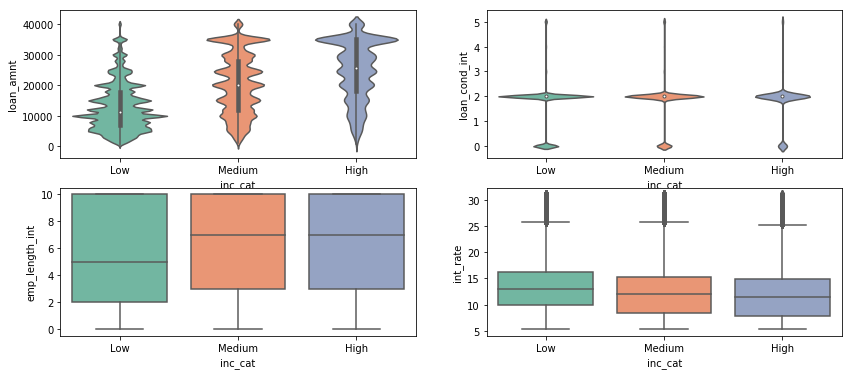

In [105]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['inc_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'inc_cat'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'inc_cat'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'inc_cat'] = 'High'
    
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="inc_cat", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="inc_cat", y="loan_cond_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="inc_cat", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="inc_cat", y="int_rate", data=df, palette="Set2", ax=ax4)

In [106]:
# observing default ratio by states

by_cond = df.groupby('addr_state')['loan_cond_s'].value_counts()/ df.groupby('addr_state')['loan_cond_s'].count()
by_emp_length = df.groupby(['addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_cond_bystate = pd.crosstab(df['addr_state'], df['loan_cond_s'] )

cross_cond = pd.crosstab(df["addr_state"], df["loan_cond_s"])

# Percentage of condition of loan
percent_loan_cont = pd.crosstab(df['addr_state'], df['loan_cond_s']).apply(lambda x: x/x.sum() * 100)
cond_ratio = cross_cond["Bad Loan"]/cross_cond["Good Loan"]
by_dti = df.groupby(['addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)

default_ratio = cond_ratio.values.tolist()
avg_dti = by_dti['dti'].values.tolist()
avg_emp_length = by_emp_length["emp_length_int"].values.tolist()
num_badloans = loan_cond_bystate['Bad Loan'].values.tolist()
percent_all_badloans = percent_loan_cont['Bad Loan'].values.tolist()

risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', num_badloans),
                         ('percentage_of_badloans', percent_all_badloans),
                         ('average_dti', avg_dti),
                         ('average_emp_length', avg_emp_length)])

risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.sort_values(by=['default_ratio'], ascending=False).head(10)

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
25,MS,0.414,2017,0.664,20.663,5.955
29,NE,0.386,1038,0.342,20.181,5.452
2,AR,0.355,2709,0.892,20.233,5.786
1,AL,0.347,4406,1.451,20.169,6.040
36,OK,0.341,3214,1.059,19.935,5.661
18,LA,0.339,4047,1.333,19.398,5.721
34,NY,0.321,27558,9.077,16.573,5.702
20,MD,0.314,7720,2.543,17.790,5.896
9,FL,0.311,23399,7.707,18.530,5.383
33,NV,0.309,4891,1.611,18.552,5.489


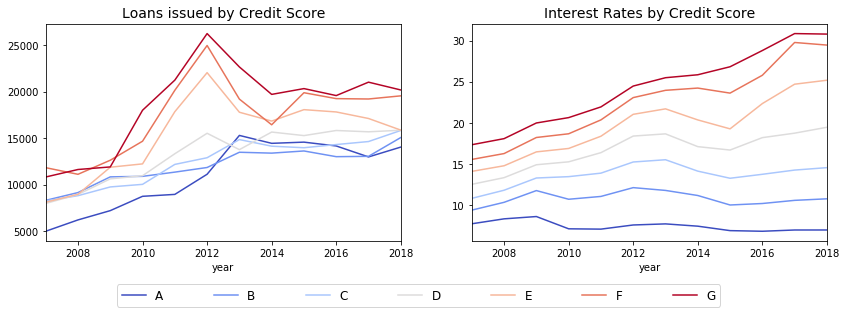

In [107]:
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

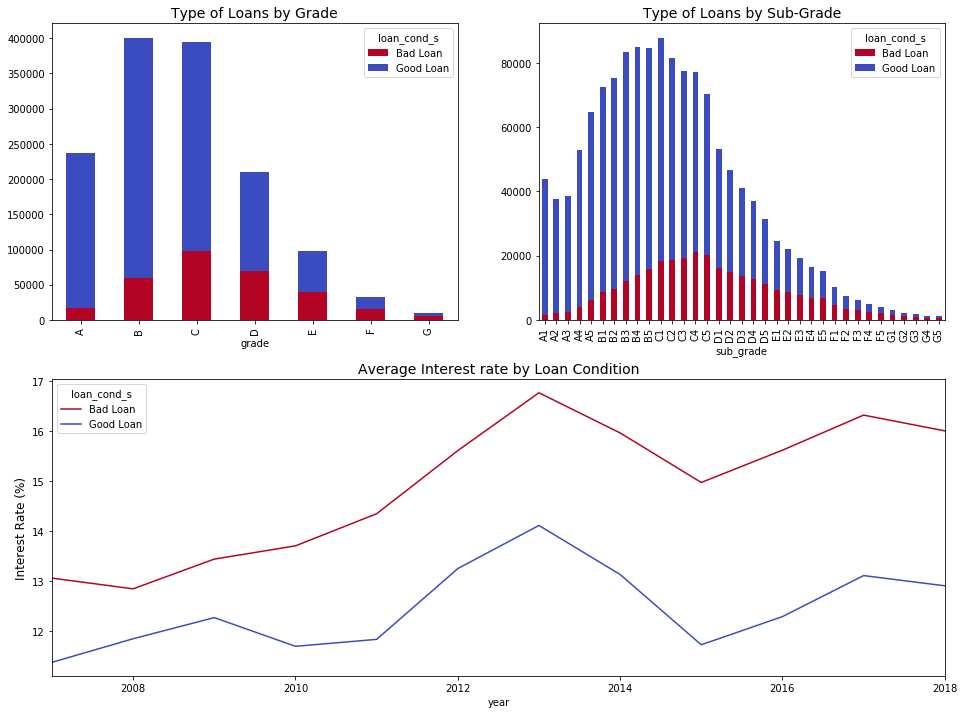

In [108]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_grade = df.groupby(['grade', 'loan_cond_s']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_sub_grade = df.groupby(['sub_grade', 'loan_cond_s']).size()
loans_by_sub_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_cond_s']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [116]:
df.groupby['year']['loan_amnt'].value_counts()

TypeError: 'method' object is not subscriptable

In [109]:
# df['loan_cond_s']
# loans_by_grade = df.groupby(['grade', 'loan_cond_s']).size()
# loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
# ax1.set_title('Type of Loans by Grade', fontsize=14)


0          Good Loan
1          Good Loan
2          Good Loan
4          Good Loan
5          Good Loan
6          Good Loan
7          Good Loan
8          Good Loan
9          Good Loan
12         Good Loan
13          Bad Loan
14         Good Loan
15         Good Loan
16         Good Loan
17         Good Loan
19         Good Loan
20         Good Loan
21         Good Loan
22         Good Loan
23         Good Loan
24         Good Loan
25          Bad Loan
26         Good Loan
27         Good Loan
28         Good Loan
29         Good Loan
30          Bad Loan
31          Bad Loan
32         Good Loan
33          Bad Loan
             ...    
2260639    Good Loan
2260640    Good Loan
2260641    Good Loan
2260642    Good Loan
2260643     Bad Loan
2260645    Good Loan
2260646    Good Loan
2260648    Good Loan
2260649    Good Loan
2260651    Good Loan
2260652     Bad Loan
2260657     Bad Loan
2260661    Good Loan
2260663    Good Loan
2260666     Bad Loan
2260667    Good Loan
2260672     B

In [112]:
import matplotlib.pyplot as plt

port_ROI = []

for i in range(500):
    sample = df.sample(100)
    port = np.mean(sample['ROI'])
    port_ROI.append(port)
    
#     print ("Annual Volatility =",str(round(vol,4)*100)+"%")

KeyboardInterrupt: 

In [ ]:
from collections import Counter
from sklearn import preprocessing

data = {'port_ROI':str(round(port_ROI, 4)*100}
df = pd.DataFrame(data)
df

# fig, ax = plt.subplots()
# df = df.sort_values('port_ROI')
# df.groupby('port_ROI').size().plot.hist()
# # value_counts().plot(ax=ax, kind='bar')


# cols = df.columns
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(np_scaled, columns = cols)
# df_normalized.plot.bar()

# # count = Counter(data)
# df = pd.DataFrame.from_dict(count, orient='index')
# df.plot(kind='bar')




# data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
# cols = data.columns
# df = pd.DataFrame(data)
# df

# 

In [61]:
# port_ROI

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3ed46a58>,
      dtype=object)

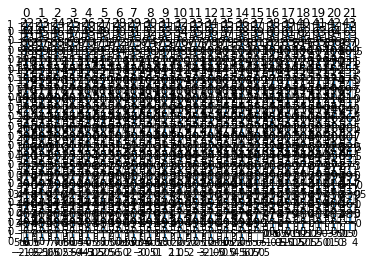

In [43]:
# port_ROI = pd.DataFrame(port_ROI)     

# port_ROI.value_counts().plot('bar')
    

#port_ROI #.apply(lambda x: pd.Series(x)).plot(kind='bar', width=0.9)
# plt.plot(port_ROI)
    

In [ ]:
df.sample(n = 100, replace = False) 

def crude_monte_carlo(num_samples=500):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    sum_of_samples = 0
    for i in range(num_samples):
        sample = df.sample(n = 100, replace = False) 
        ROI = (sample['Total_pymnt']- sample['funded_amnt'])/(sample['funded_amnt'])

        
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)